In [ ]:
# This script calculates the sharpness of oscillations

**Imports**

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

In [2]:
import pac
import shap_L as til
from scipy.signal import firwin

**Load data**

In [3]:
lfp = til.loadPD()
Fs, t, S, Sdy, flo, fhi = til.loadmeta()
print(range(S))

range(0, 13)


In [4]:

t = np.arange(0, 30, 1 / Fs) 
print(lfp)
print(flo)

{'B': array([ array([-2.54816274, -2.1762993 , -1.23493339, ..., -0.83928265,
       -1.11629042, -0.80394042]),
       array([-0.20233991, -0.26883531, -0.61937982, ...,  0.37617334,
        0.13450286, -0.54910727]),
       array([-0.17683184,  0.17994562,  0.12869409, ...,  1.25597347,
        0.97389966,  0.67194508]),
       array([ 0.47518782,  0.88176372,  1.40589861, ...,  1.16035849,
        0.99884355,  0.76355283]),
       array([-2.50273776, -1.9179138 , -1.54917377, ...,  0.67602505,
        1.29388251,  1.48937676]),
       array([-3.24556912, -3.33031913, -2.78738681, ..., -1.24580701,
       -1.71512566, -2.17682527]),
       array([-1.41498841, -1.5849614 , -1.36913663, ..., -2.13043215,
       -2.23142307, -1.85796127]),
       array([ 0.58497335,  0.46980766,  0.11921291, ...,  0.74874972,
        0.61232823,  0.32768905]),
       array([ 0.62211434,  1.06816213,  0.50668292, ...,  1.71736746,
        1.66118235,  1.17608092]),
       array([-1.73283842, -1.77439218,

 **Compute features of waveform shape**

In [5]:
import shape
pks, trs = shape.findpt(
            lfp['B'][5], (13,30), Fs=1000, boundary=100)
print(pks)

[  113   190   234   299   345   376   403   490   541   594   653   694
   747   837   858   922   959  1031  1101  1141  1171  1224  1270  1307
  1372  1403  1490  1550  1588  1618  1650  1691  1731  1782  1823  1871
  1921  1966  2010  2081  2114  2185  2212  2255  2296  2352  2407  2444
  2480  2551  2619  2672  2719  2807  2864  2894  2954  3011  3078  3118
  3160  3200  3261  3303  3357  3417  3449  3494  3528  3565  3593  3628
  3681  3719  3799  3852  3931  3972  4049  4114  4159  4223  4281  4322
  4389  4444  4486  4538  4566  4633  4665  4698  4753  4783  4806  4850
  4893  4923  4965  5041  5074  5123  5179  5220  5297  5354  5413  5444
  5511  5586  5627  5675  5757  5825  5856  5916  5964  6051  6081  6137
  6189  6269  6305  6374  6402  6440  6479  6512  6568  6604  6668  6735
  6779  6837  6900  6955  7036  7075  7119  7179  7251  7287  7348  7407
  7440  7508  7600  7646  7719  7784  7820  7838  7882  7921  7985  8054
  8089  8154  8186  8248  8333  8366  8394  8447  8

/Users/RChenLab/anaconda/lib/python3.6/site-packages/scipy/signal/windows.py:113: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  w = np.zeros(M)


In [6]:


widthS = 10 # hyperparameter for calculating sharpness

pks, trs, pksharp, trsharp, esrs, \
peaktotrough, risteep, desteep, rdsrs, \
risetodecay = til.measure_shape(lfp, widthS=widthS)

/Users/RChenLab/anaconda/lib/python3.6/site-packages/scipy/signal/windows.py:113: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  w = np.zeros(M)


# A
### Locating oscillatory extrema

In [7]:
# Select one recording
group ='B'
subj=2
x = lfp[group][subj]

# Bandpass filter in be ta frequency range
w = 3
xbeta = til.firf(x, flo, Fs, w = w, rmvedge=False)

# Determine rising and falling zerocrossings.
pos = xbeta > 0
zerorises = (pos[:-1] & ~pos[1:]).nonzero()[0]
pos = xbeta < 0
zerofalls = (pos[:-1] & ~pos[1:]).nonzero()[0]

/Users/RChenLab/anaconda/lib/python3.6/site-packages/scipy/signal/windows.py:113: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  w = np.zeros(M)


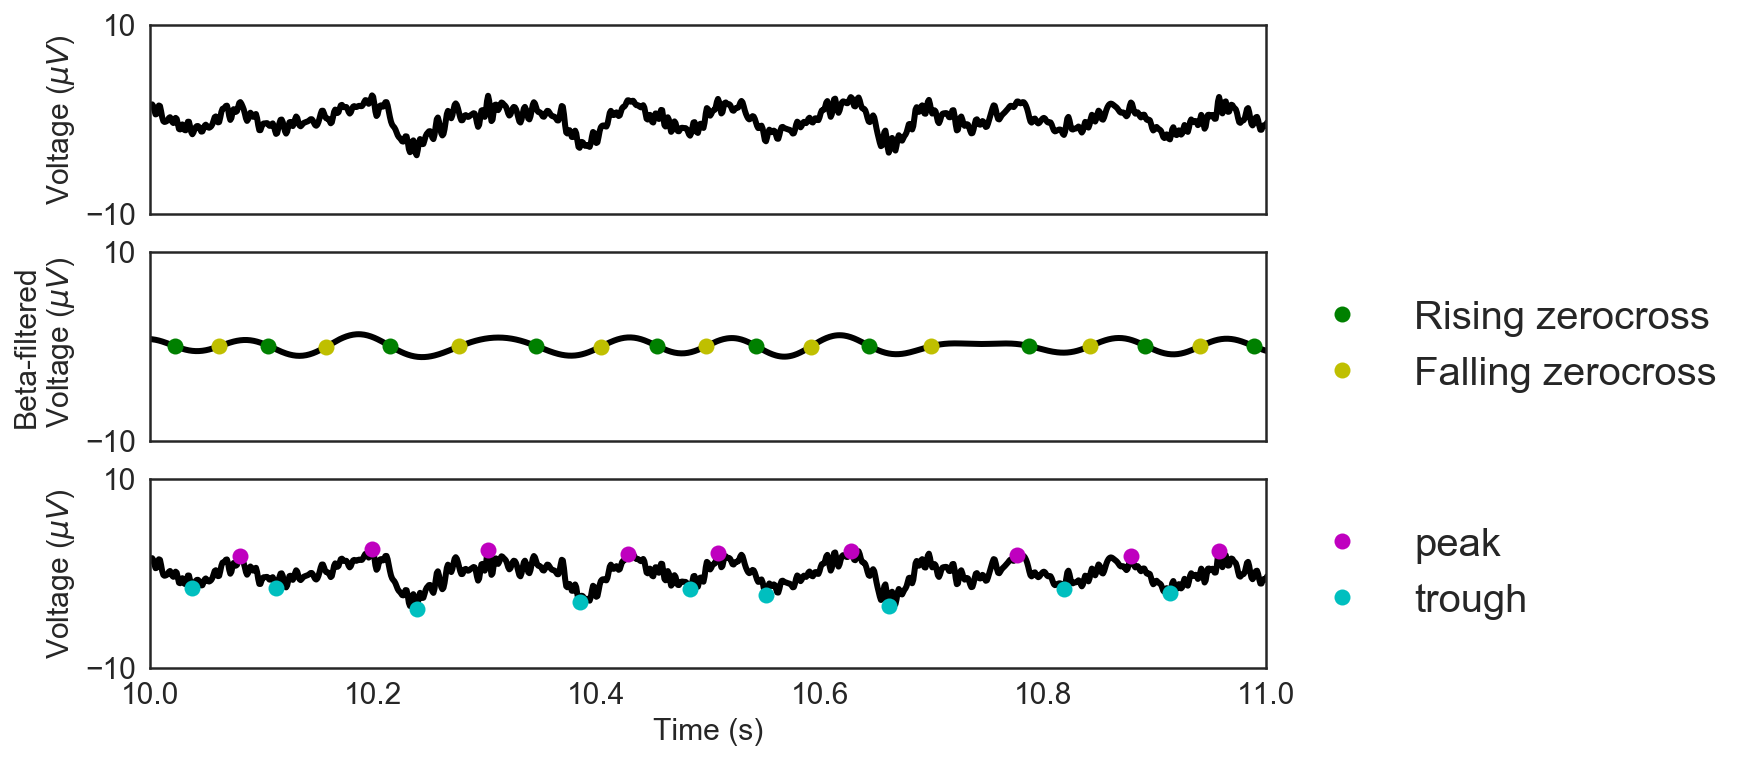

In [8]:
xlim = (10,11)
xlim2 = (4.83,4.88)
ylim = (-10,10)
pkidx = 104
tridx = 103

fig = plt.figure(figsize=(10,8))
plt.subplot(4,1,1)
plt.plot(t, x,'k',linewidth=3)
plt.ylabel('Voltage ($\mu V$)',size=15)
plt.ylim(ylim)
plt.xlim(xlim)
plt.yticks(ylim,size=15)
plt.tick_params(labelsize=15)
plt.xticks(visible=False)

plt.subplot(4,1,2)
plt.plot(t, xbeta, 'k',linewidth=3)
plt.plot(t[zerorises], xbeta[zerorises], 'go', ms=8,label='Rising zerocross')
plt.plot(t[zerofalls], xbeta[zerofalls], 'yo', ms=8,label='Falling zerocross')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)
plt.ylabel('Beta-filtered\n Voltage ($\mu V$)',size=15)
plt.xlim(xlim)
plt.ylim(ylim)
plt.yticks(ylim,size=15)
plt.tick_params(labelsize=15)
plt.xticks(visible=False)

plt.subplot(4,1,3)
plt.plot(t, x, 'k-',linewidth=3)
plt.plot(t[pks[group][subj]],x[pks[group][subj]],'mo', ms=8, label='peak')
plt.plot(t[trs[group][subj]],x[trs[group][subj]],'co', ms=8, label='trough')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)
plt.ylabel('Voltage ($\mu V$)',size=15)
plt.ylim(ylim)
plt.yticks(ylim,size=15)
plt.xlim(xlim)
plt.xlabel('Time (s)',size=15)
plt.tick_params(labelsize=15)

# B
### Estimating extrema sharpness

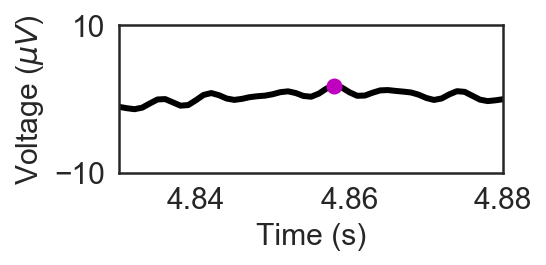

In [9]:
plt.figure(figsize=(4,2))
plt.plot(t, x, 'k-',linewidth=3)
plt.plot(t[pks[group][subj]],x[pks[group][subj]],'mo', ms=8, label='peak')
plt.plot(t[trs[group][subj]],x[trs[group][subj]],'co', ms=8, label='trough')
plt.plot([t[pks[group][subj][pkidx]]-widthS/Fs,t[pks[group][subj][pkidx]]-widthS/Fs],[-1000,1000],'m-')
plt.plot([t[pks[group][subj][pkidx]]+widthS/Fs,t[pks[group][subj][pkidx]]+widthS/Fs],[-1000,1000],'m-')
plt.plot([t[trs[group][subj][tridx]]-widthS/Fs,t[trs[group][subj][tridx]]-widthS/Fs],[-1000,1000],'c-')
plt.plot([t[trs[group][subj][tridx]]+widthS/Fs,t[trs[group][subj][tridx]]+widthS/Fs],[-1000,1000],'c-')
plt.plot(t[pks[group][subj][pkidx]-widthS],x[pks[group][subj][pkidx]-widthS],'m^',ms=10)
plt.plot(t[pks[group][subj][pkidx]+widthS],x[pks[group][subj][pkidx]+widthS],'m^',ms=10)
plt.plot(t[trs[group][subj][tridx]-widthS],x[trs[group][subj][tridx]-widthS],'c^',ms=10)
plt.plot(t[trs[group][subj][tridx]+widthS],x[trs[group][subj][tridx]+widthS],'c^',ms=10)
plt.ylabel('Voltage ($\mu V$)',size=15)
plt.ylim(ylim)
plt.yticks(ylim,size=15)
plt.xlim(xlim2)
plt.tick_params(labelsize=15)
plt.xlabel('Time (s)',size=15)

plt.tight_layout()

In [10]:
print(round(x[pks[group][subj][pkidx]]))
print(round(x[pks[group][subj][pkidx]-widthS]))
print(round(x[pks[group][subj][pkidx]+widthS]))
print(round(pksharp[group][subj][pkidx]))

print(round(x[trs[group][subj][tridx]]))
print(round(x[trs[group][subj][tridx]-widthS]))
print(round(x[trs[group][subj][tridx]+widthS]))
print(round(trsharp[group][subj][tridx]))

2.0
1.0
0.0
1.0
-2.0
-1.0
-2.0
1.0


In [11]:
import imp
imp.reload(til)

<module 'shap_L' from '/Users/RChenLab/Documents/All_MATLAB_files/SharpnesStudy/LFP_analyses/shap_L.py'>

# C
### Sharpness in 1 subject before DBS

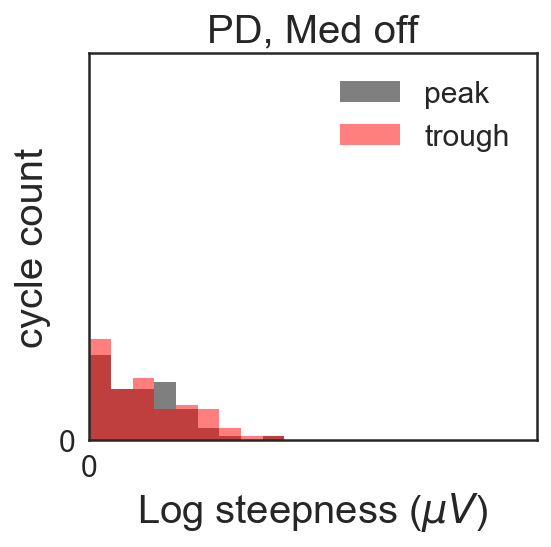

In [12]:
s = 7

Nbins = 20
bins=np.linspace(0,np.max(np.hstack((np.log10(risteep['B'][s]),np.log10(trsharp['B'][s])))),Nbins)

plt.figure(figsize=(4,4))
plt.hist(np.log10(risteep['B'][s]),bins,color='k',alpha=0.5,label='peak')
plt.hist(np.log10(desteep['B'][s]),bins,color='r',alpha=0.5,label='trough')
plt.title('PD, Med off',size=20)
plt.ylabel('cycle count',size=20)
plt.xlabel('Log steepness ($\mu V$)',size=20)
plt.yticks([0,200],size=15)
plt.xticks([0,1,2,3],size=15)
plt.xlim((0,0.5))
plt.legend(loc='best',fontsize=15)
plt.ylim((0,100))
plt.tight_layout()

# D
### Sharpness in 1 subject during DBS

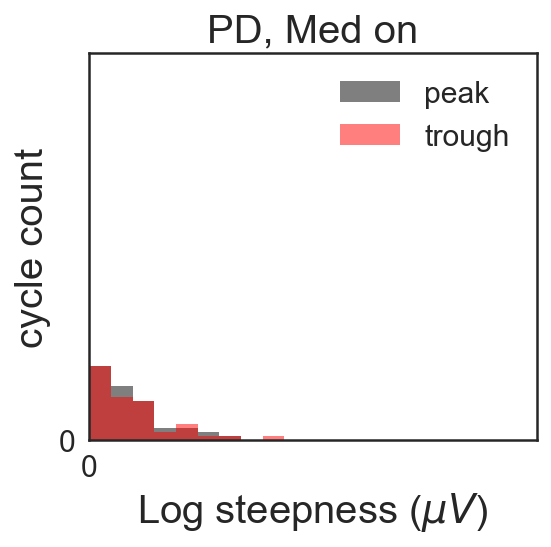

In [13]:
plt.figure(figsize=(4,4))
plt.hist(np.log10(risteep['D'][s]),bins,color='k',alpha=0.5,label='peak')
plt.hist(np.log10(desteep['D'][s]),bins,color='r',alpha=0.5,label='trough')
plt.ylabel('cycle count',size=20)
plt.title('PD, Med on',size=20)
plt.xlabel('Log steepness ($\mu V$)',size=20)
plt.yticks([0,200],size=15)
plt.xticks([0,1,2,3],size=15)
plt.xlim((0,0.5))
plt.legend(loc='best',fontsize=15)
plt.ylim((0,100))
plt.tight_layout()

# E
### Sharpness ratio change with DBS

Ttest_relResult(statistic=-1.0026452237565961, pvalue=0.33582208026531291)


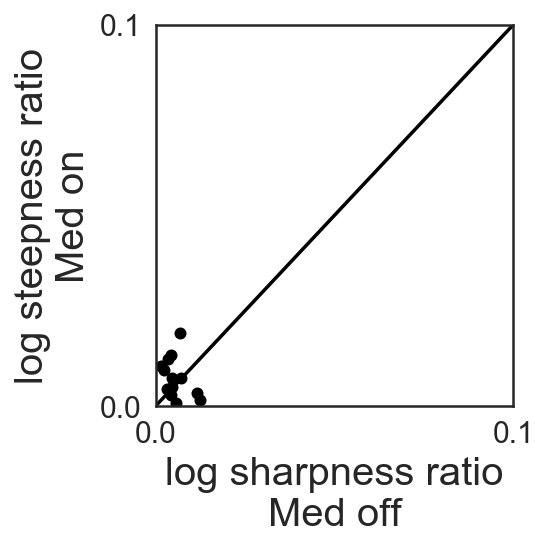

In [14]:
from plt import scatt_2cond
scatt_2cond(rdsrs['B'],rdsrs['D'],ms=12,
           lims = (0,.1), xlabel = 'log sharpness ratio\nMed off',
            ylabel = 'log steepness ratio\nMed on',figsize=(4,4))
print(sp.stats.ttest_rel(rdsrs['B'],rdsrs['D']))

import scipy.io as sio
#sio.savemat('/Users/RChenLab/Documents/All_MATLAB_files/SharpnesStudy/LFP_analyses/Files/sharpness.mat', {'esrs':esrs})
#plt.savefig('/Users/RChenLab/Documents/All_MATLAB_files/SharpnesStudy/LFP_analyses/Files/Results/leftSTN_sharpnessRatio.png')